In [6]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datapath = "/data/Misc"
filename = "20230327_183100_AlRes.csv"
line_atten_dB = 56.5

In [11]:
data = pd.read_csv(os.path.join(datapath,filename),header=2)
key_f, key_lm, key_deg = data.keys()
data["phi"] = data[key_deg] * np.pi/180.
data["mag"] = np.power(10,data[key_lm]/20.)
data["S21r"] = data["mag"]*np.cos(data["phi"])
data["S21i"] = data["mag"]*np.sin(data["phi"])
data

,! Stimulus(Hz),S21(dB),S21(°),phi,mag,S21r,S21i
0,4.241923e+09,-5.879573,61.732265,1.077431,0.508184,0.240672,0.447580
1,4.241923e+09,-6.010329,60.942120,1.063641,0.500592,0.243134,0.437582
2,4.241923e+09,-5.946432,60.747684,1.060247,0.504288,0.246423,0.439979
3,4.241923e+09,-5.997968,60.716066,1.059695,0.501304,0.245207,0.437241
4,4.241923e+09,-6.013420,61.124918,1.066831,0.500413,0.241650,0.438199
...,...,...,...,...,...,...,...
19995,4.242073e+09,-5.955793,63.692774,1.111649,0.503745,0.223252,0.451572
19996,4.242073e+09,-5.841156,63.239982,1.103746,0.510437,0.229827,0.455769
19997,4.242073e+09,-5.932522,62.793736,1.095957,0.505096,0.230927,0.449215
19998,4.242073e+09,-6.010081,63.775860,1.113099,0.500606,0.221210,0.449080


(4.241923, 4.242073)

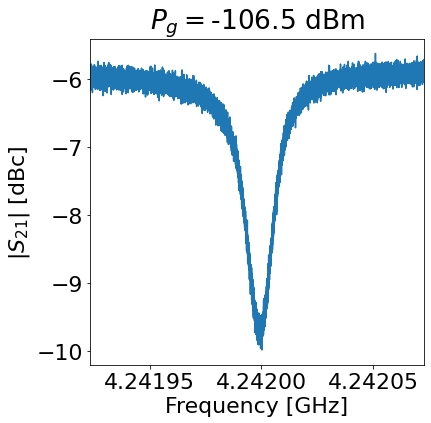

In [12]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$|S_{21}|$ [dBc]")
ax0.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax0.plot(data[key_f]/1e9,data[key_lm])
ax0.set_xlim([np.min(data[key_f])/1e9,np.max(data[key_f])/1e9])

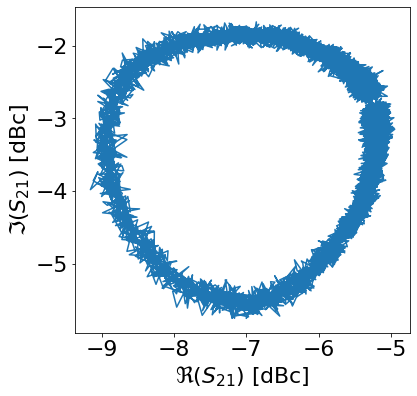

In [13]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel(r"$\Re(S_{21})$ [dBc]")
ax0.set_ylabel(r"$\Im(S_{21})$ [dBc]")
ax0.plot(data[key_lm]*np.cos(data["phi"]),data[key_lm]*np.sin(data["phi"]))

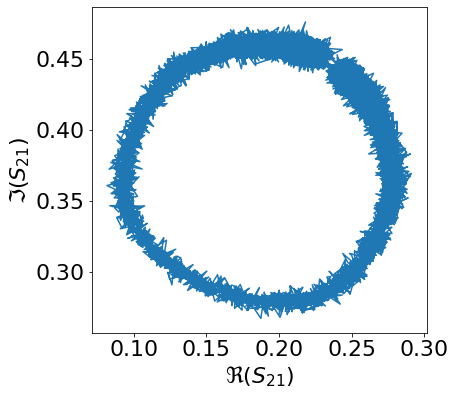

In [14]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel(r"$\Re(S_{21})$")
ax0.set_ylabel(r"$\Im(S_{21})$")
ax0.plot(data["S21r"],data["S21i"])